In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [91]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Telco-Customer-Churn.csv")

In [92]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
df.shape

(7043, 21)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


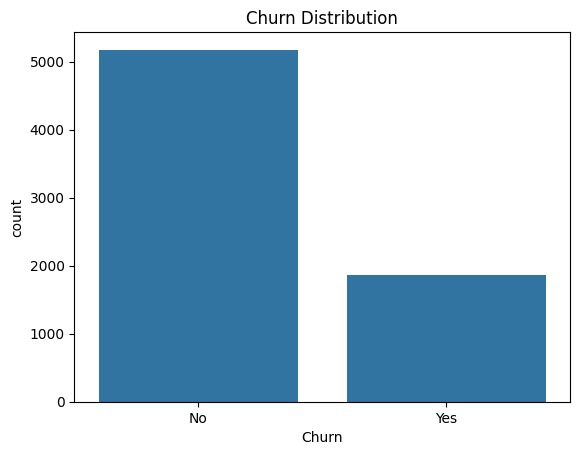

In [95]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [96]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [97]:
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [98]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


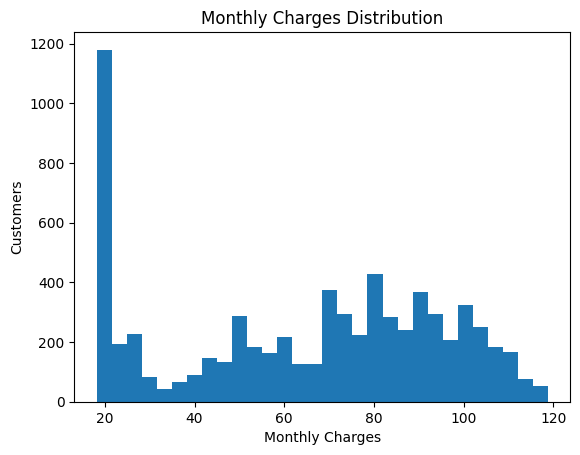

In [99]:
plt.hist(df['MonthlyCharges'], bins=30)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.show()


In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])


In [101]:
df = pd.get_dummies(df, drop_first=True)


In [102]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,False,False,False,False,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,0,False,False,False,False,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [103]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((5625, 7061), (1407, 7061))

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [106]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(1407,))

In [108]:
accuracy_score(y_test,y_pred)

0.7547974413646056

In [109]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [110]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(1407,))

In [111]:
accuracy_score(y_test,y_pred)

0.749822316986496

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
y_pred = rf.predict(X_test)

In [114]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(1407,))

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [116]:
accuracy_score(y_test,y_pred)

0.7896233120113717

In [117]:

cm = confusion_matrix(y_test,y_pred)

In [118]:
cm

array([[948,  85],
       [211, 163]])

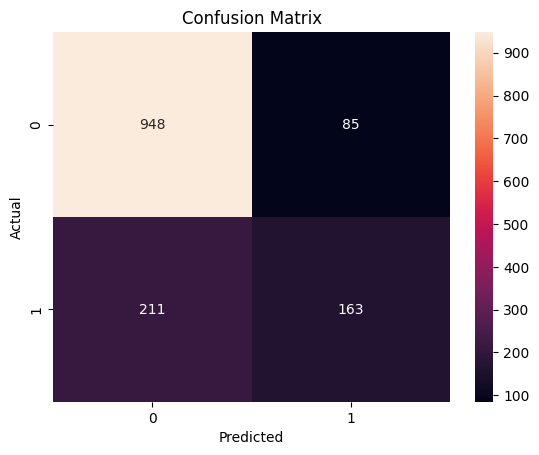

In [119]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [120]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1159
           1       0.44      0.66      0.52       248

    accuracy                           0.79      1407
   macro avg       0.68      0.74      0.69      1407
weighted avg       0.83      0.79      0.80      1407

